In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## pytorch

### torch 安装验证

In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.5.1+cu124
False


### 创建张量

In [ ]:
import torch

a = torch.tensor([1,2])
print(a,type(a))

#默认float类型
b = torch.Tensor([1,2])
print(b,type(b))

c = torch.rand((2,2))
print(c, type(c))

d = torch.ones((2,2))
print(d, type(d))

e = torch.zeros((2,2))
print(e, type(e))

f = torch.randn(2,2)
print(f, type(f))

tensor([1, 2]) <class 'torch.Tensor'>
tensor([1., 2.]) <class 'torch.Tensor'>
tensor([[0.4976, 0.2902],
        [0.0413, 0.2357]]) <class 'torch.Tensor'>
tensor([[1., 1.],
        [1., 1.]]) <class 'torch.Tensor'>
tensor([[0., 0.],
        [0., 0.]]) <class 'torch.Tensor'>
tensor([[-1.4930,  0.2603],
        [-0.2499,  0.1426]]) <class 'torch.Tensor'>


### 数学运算：加减乘除和矩阵操作

In [ ]:
x = torch.tensor([1, 2], dtype=torch.float32)
y = torch.tensor([3, 4], dtype=torch.float32)

# 1. 逐元素运算
print("加法:", x + y)  # 或 torch.add(x, y)
print("乘法:", x * y)  # 或 torch.mul(x, y)

# 2. 矩阵乘法
matrix_a = torch.tensor([[1,2], [3,4]], dtype=torch.float32)
matrix_b = torch.tensor([[5,6], [7,8]], dtype=torch.float32)
print("矩阵乘:\n", torch.mm(matrix_a, matrix_b))  # 或 @运算符

加法: tensor([4., 6.])
乘法: tensor([3., 8.])
矩阵乘:
 tensor([[19., 22.],
        [43., 50.]])


### 形状变换

In [ ]:
original = torch.tensor([[1,2], [3,4], [5,6]])

# 1. 改变形状（总元素数必须不变）
reshaped = original.view(2, 3)  # 变成2行3列

# 2. 增加/减少维度
expanded = original.unsqueeze(0)  # 在0轴前加维度 → 形状 [1,3,2]
squeezed = expanded.squeeze()    # 删除所有长度为1的维度 → 变回[3,2]

print("变形后:\n", reshaped)
print("增维后形状:", expanded.shape)

# 重点：view() 需要连续内存，不连续时用 reshape()

变形后:
 tensor([[1, 2, 3],
        [4, 5, 6]])
增维后形状: torch.Size([1, 3, 2])


### 切片索引

In [ ]:
tensor = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])

# 和Python列表操作一样！
print("第一行:", tensor[0])        # [1,2,3]
print("第二列:", tensor[:, 1])     # [2,5,8]
print("右下角2x2区域:\n", tensor[1:, 1:])  # [[5,6], [8,9]]

第一行: tensor([1, 2, 3])
第二列: tensor([2, 5, 8])
右下角2x2区域:
 tensor([[5, 6],
        [8, 9]])


### 与numpy 互转

In [ ]:
import numpy as np
# Tensor → Numpy（共享内存！）
tensor = torch.tensor([1,2,3])
numpy_array = tensor.numpy()
print("转Numpy:", numpy_array)

# Numpy → Tensor
new_tensor = torch.from_numpy(np.array([4,5,6]))
print("转回Tensor:", new_tensor)

转Numpy: [1 2 3]
转回Tensor: tensor([4, 5, 6])


### 设备切换

In [ ]:
# 检查GPU是否可用
device = "cuda" if torch.cuda.is_available() else "cpu"
print("当前设备:", device)

# 创建时指定设备
tensor_on_gpu = torch.tensor([1,2,3], device=device)

# 已有张量转移设备
cpu_tensor = tensor_on_gpu.to("cpu")
print("GPU张量:", tensor_on_gpu.device)

当前设备: cpu
GPU张量: cpu


### 自动求导：神经网络的「核心魔法」

In [ ]:
# 创建需要追踪梯度的张量
x = torch.tensor(3.0, requires_grad=True)

# 构建计算过程
y = x**2 + 2*x + 1  # y = x² + 2x + 1

# 反向传播计算梯度
y.backward()

# 查看导数 dy/dx
print("当x=3时，导数是:", x.grad)  # 3*2 + 2 = 8

当x=3时，导数是: tensor(8.)


### 数据加载：处理大规模数据集

In [ ]:
from torch.utils.data import Dataset, DataLoader

# 1. 创建自定义数据集
class MyDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# 2. 创建数据加载器
dataset = MyDataset([1,2,3,4,5])
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# 3. 遍历数据
for batch in dataloader:
    print("批次数据:", batch)

批次数据: tensor([5, 1])
批次数据: tensor([3, 4])
批次数据: tensor([2])


### 模型保存/加载：保存训练成果

In [ ]:
# 定义一个简单模型
model = torch.nn.Linear(3, 1)  # 输入3维，输出1维

# 保存模型
torch.save(model.state_dict(), 'model_weights.pth')  # 只保存参数
torch.save(model, 'full_model.pth')                 # 保存整个模型

# 加载模型
loaded_model = torch.load('full_model.pth')  # 直接加载整个模型

# 仅加载参数（需先创建相同结构的模型）
new_model = torch.nn.Linear(3, 1)
new_model.load_state_dict(torch.load('model_weights.pth'))

<ipython-input-16-42d3b755d180>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load('full_model.pth')  # 直接加载整个模型
<ipython-input-16-42d3b755d180>:13: 

<All keys matched successfully>

### 分布式训练基础：多GPU加速

In [ ]:
# 检查可用GPU数量
print("可用GPU数量:", torch.cuda.device_count())

# 单机多GPU训练（数据并行）
model = torch.nn.Linear(10, 2)
if torch.cuda.device_count() > 1:
    model = torch.nn.DataParallel(model)  # 包装模型

# 将模型移到GPU
model.to('cuda')

# 正常训练即可
inputs = torch.randn(64,10).to('cuda')
outputs = model(inputs)

可用GPU数量: 0


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

### 完整模型

当前设备: cuda
图片形状: torch.Size([64, 1, 28, 28])
MNIST_Model(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1600, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)
Epoch 1/20 损失: 0.1326
Epoch 2/20 损失: 0.0415
Epoch 3/20 损失: 0.0272
Epoch 4/20 损失: 0.0211
Epoch 5/20 损失: 0.0157
Epoch 6/20 损失: 0.0123
Epoch 7/20 损失: 0.0110
Epoch 8/20 损失: 0.0085
Epoch 9/20 损失: 0.0073
Epoch 10/20 损失: 0.0060
Epoch 11/20 损失: 0.0068
Epoch 12/20 损失: 0.0042
Epoch 13/20 损失: 0.0063
Epoch 14/20 损失: 0.0031
Epoch 15/20 损失: 0.0042
Epoch 16/20 损失: 0.0044
Epoch 17/20 损失: 0.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from font(s) DejaVu Sans.
  fig.canvas

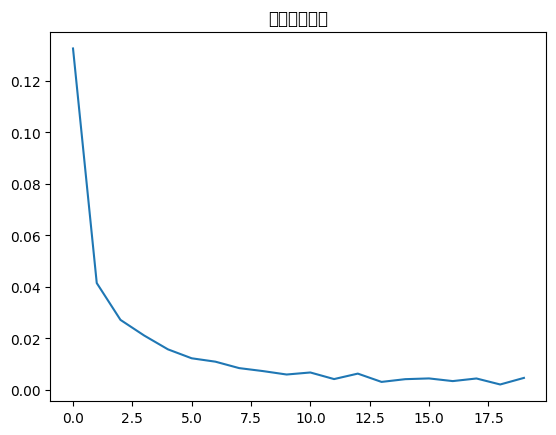

测试集准确率: 99.22%


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


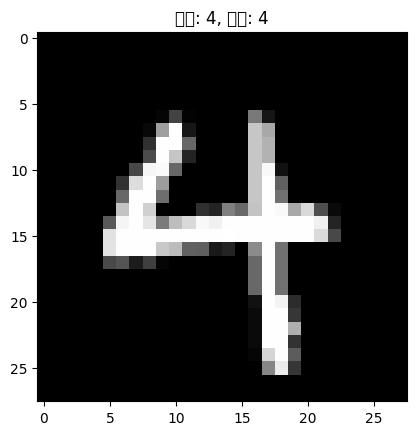

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# 检查GPU是否可用
device = "cuda" if torch.cuda.is_available() else "cpu"
print("当前设备:", device)

# 1. 定义数据转换（预处理）
transform = transforms.Compose([
    transforms.ToTensor(),          # 转为Tensor格式（自动归一化到0-1）
    transforms.Normalize((0.1307,), (0.3081,))  # 标准化（MNIST的均值和标准差）
])

# 2. 下载数据集
train_data = datasets.MNIST(
    root='data',          # 数据存储路径
    train=True,           # 训练集
    download=True,        # 自动下载
    transform=transform   # 应用预处理
)

test_data = datasets.MNIST(
    root='data',
    train=False,          # 测试集
    transform=transform
)

# 3. 创建数据加载器（自动分批次）
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1000, shuffle=False)

# 查看数据形状示例
images, labels = next(iter(train_loader))
print("图片形状:", images.shape)  # torch.Size([64, 1, 28, 28]) → 64张1通道的28x28图片

class MNIST_Model(nn.Module):
    def __init__(self):
        super().__init__()
        # 卷积层组合
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, 3),   # 输入1通道，输出32通道，3x3卷积核
            nn.ReLU(),              # 激活函数
            nn.MaxPool2d(2),        # 最大池化（缩小一半尺寸）

            nn.Conv2d(32, 64, 3),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        # 全连接层
        self.fc_layers = nn.Sequential(
            nn.Flatten(),           # 展平多维数据
            nn.Linear(64*5*5, 128), # 输入维度需要计算（后面解释）
            nn.ReLU(),
            nn.Linear(128, 10)      # 输出10个数字的概率
    )

    def forward(self, x):
        x = self.conv_layers(x)     # 通过卷积层
        x = self.fc_layers(x)       # 通过全连接层
        return x

# 创建模型实例并转移到设备
model = MNIST_Model().to(device)
print(model)

criterion = nn.CrossEntropyLoss()          # 损失函数（分类任务常用）
optimizer = optim.Adam(model.parameters(), lr=0.001)  # 优化器（自动调节学习率）

epochs = 20
train_losses = []

for epoch in range(epochs):
    model.train()  # 设置为训练模式
    running_loss = 0.0

    for images, labels in train_loader:
        # 数据转移到设备（GPU/CPU）
        images, labels = images.to(device), labels.to(device)

        # 前向传播
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 反向传播
        optimizer.zero_grad()  # 清空之前的梯度
        loss.backward()        # 计算梯度
        optimizer.step()       # 更新参数

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{epochs} 损失: {epoch_loss:.4f}")

# 绘制损失曲线
plt.plot(train_losses)
plt.title("训练损失变化")
plt.show()


model.eval()  # 设置为评估模式
correct = 0
total = 0

with torch.no_grad():  # 不计算梯度（节省内存）
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)  # 取概率最大的类别
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"测试集准确率: {100 * correct / total:.2f}%")


# 随机选择一张测试图片
index = np.random.randint(0,1000)  # 可以修改这个数字试不同图片
test_image, true_label = test_data[index]
test_image = test_image.unsqueeze(0).to(device)  # 增加批次维度

# 预测
with torch.no_grad():
    output = model(test_image)
predicted_label = torch.argmax(output).item()

# 显示结果
plt.imshow(test_image.cpu().squeeze(), cmap='gray')
plt.title(f"预测: {predicted_label}, 真实: {true_label}")
plt.show()



In [15]:
import pandas as pd
from collections import Counter

# 示例数据
data = {'Category': ['A', 'B', 'C', 'A']}
df = pd.DataFrame(data)
print(Counter(df['Category']))
df[df['Category']=='A'] = 1
df[df['Category']=='B'] = 2
df[df['Category']=='C'] = 3

print(df)

Counter({'A': 2, 'B': 1, 'C': 1})
  Category
0        1
1        2
2        3
3        1


In [8]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# 假设我们有一个包含分类数据的特征
# 这里使用一个简单的列表来表示
data = [['cat'], ['dog'], ['bird'], ['cat'], ['bird']]

# 创建一个OneHotEncoder对象
encoder = OneHotEncoder()

# 将数据转换为numpy数组
data_array = np.array(data)

# 对数据进行One-Hot编码
onehot_encoded = encoder.fit_transform(data_array)

# 打印One-Hot编码后的结果
print(onehot_encoded)


  (0, 1)	1.0
  (1, 2)	1.0
  (2, 0)	1.0
  (3, 1)	1.0
  (4, 0)	1.0
